In [1]:
# Make Jupyter Notebook full screen 
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [2]:
import geopandas
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

In [3]:
DATA_PATH = '/Users/megantabbutt/BRT_data/GeoData/'
DATA_PATH_Dems = '/Users/megantabbutt/BRT_data/DemographicData/'

RoutesShapeFile = "mmt_gtfs/Metro_Transit_Bus_Routes.shp"
CitiesShapeFile = "Shapes/City/City_Limit.shp"
LakesShapeFile = "Shapes/Lakes/Lakes_and_Rivers.shp"
StreetsShapeFile = "Shapes/Street/Street_Centerlines_and_Pavement_Data.shp"


cityShapes_df = geopandas.read_file(CitiesShapeFile)
lakeShapes_df = geopandas.read_file(LakesShapeFile)
streetShapes_df = geopandas.read_file(StreetsShapeFile)

In [4]:
df = geopandas.read_file(DATA_PATH+"tl_2018_55_bg.shp")

In [5]:
df_dane = df[df['COUNTYFP'] == "025"]
df_dane.head(3)

,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,GEOID,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
570,55,025,002000,1,550250020001,Block Group 1,G5030,S,607897,1617,+43.1040466,-089.3349658,"POLYGON ((-89.34179 43.10456, -89.34163 43.104..."
577,55,025,001300,1,550250013001,Block Group 1,G5030,S,1070101,503,+43.0541194,-089.3889560,"POLYGON ((-89.40006 43.05842, -89.39907 43.058..."
578,55,025,001401,1,550250014011,Block Group 1,G5030,S,2579158,42576,+43.0468061,-089.3795062,"POLYGON ((-89.39403 43.04175, -89.39313 43.041..."


In [6]:
df_mad = pd.read_csv(DATA_PATH_Dems + "VehicleOwnership_2018.txt", sep='\t')
df_mad.info()
df_mad.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   GEOID                 310 non-null    int64
 1   Owner_noVehicle       310 non-null    int64
 2   Renter_noVehicle      310 non-null    int64
 3   AggVehiclesAvailable  310 non-null    int64
 4   Total                 310 non-null    int64
dtypes: int64(5)
memory usage: 12.2 KB


,GEOID,Owner_noVehicle,Renter_noVehicle,AggVehiclesAvailable,Total
0,550250121001,0,0,709,543
1,550250127002,11,0,1713,1482
2,550250121002,0,0,914,690


In [7]:
geoIDs_Master = [int(i) for i in list(df_dane['GEOID'])]
type(geoIDs_Master[0])

int

In [8]:
VehiclesPerCapita = dict()
for ID in geoIDs_Master:
    localDF = df_mad[df_mad['GEOID'] == ID]
    totalNoCar = df_mad.loc[df_mad['GEOID'] == ID, 'Owner_noVehicle'].item() + df_mad.loc[df_mad['GEOID'] == ID, 'Renter_noVehicle'].item()
    if localDF['AggVehiclesAvailable'].item() != -999:
        number = int(localDF['AggVehiclesAvailable'].item()) / int(localDF['Total'].item())
        #number = (int(localDF['Owner_noVehicle'].item()) + int(localDF['Renter_noVehicle'].item()))/int(localDF['AggVehiclesAvailable'].item())         
    else:
        number = None
    VehiclesPerCapita[ID] = number
    
VehiclesPerCapita

{550250020001: 0.7873831775700935,
 550250013001: 0.7363694676074407,
 550250014011: 0.7774798927613941,
 550250014012: 0.7146067415730337,
 550250014013: 0.6708708708708708,
 550250014014: 0.56973293768546,
 550250014022: 0.8664495114006515,
 550250014023: 0.85250569476082,
 550250014024: 0.8221476510067114,
 550250015012: 1.0738007380073802,
 550250015021: None,
 550250015023: 0.9407616361071932,
 550250017052: 0.6164688427299704,
 550250018022: 0.7203038674033149,
 550250019001: 0.8537095088819227,
 550250019002: 0.7831978319783198,
 550250019003: 0.7742587601078167,
 550250019004: 0.6682577565632458,
 550250019005: 0.8311345646437994,
 550250021002: 0.8519230769230769,
 550250020002: 0.7955357142857142,
 550250020003: 0.8939512961508248,
 550250020004: 0.7708830548926014,
 550250021001: 0.9295190713101161,
 550250021004: 0.8384615384615385,
 550250022002: 0.9599395313681028,
 550250029003: 0.9795539033457249,
 550250023011: 0.8285714285714286,
 550250023012: 0.9178378378378378,
 55

In [9]:
df_dane['VehiclesPerCapita'] = list(VehiclesPerCapita.values())
df_dane.head(3)

/Users/megantabbutt/Library/Python/3.8/lib/python/site-packages/geopandas/geodataframe.py:853: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,GEOID,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,VehiclesPerCapita
570,55,025,002000,1,550250020001,Block Group 1,G5030,S,607897,1617,+43.1040466,-089.3349658,"POLYGON ((-89.34179 43.10456, -89.34163 43.104...",0.787383
577,55,025,001300,1,550250013001,Block Group 1,G5030,S,1070101,503,+43.0541194,-089.3889560,"POLYGON ((-89.40006 43.05842, -89.39907 43.058...",0.736369
578,55,025,001401,1,550250014011,Block Group 1,G5030,S,2579158,42576,+43.0468061,-089.3795062,"POLYGON ((-89.39403 43.04175, -89.39313 43.041...",0.777480


In [62]:
#GeoID_mad = [str(i) for i in list(df_mad['GEOID'])]
#print(len(GeoID_mad), GeoID_mad[:5])

#GeoID_dane = [i for i in list(df_dane['GEOID'])]
#print(len(GeoID_dane), GeoID_dane[:5])

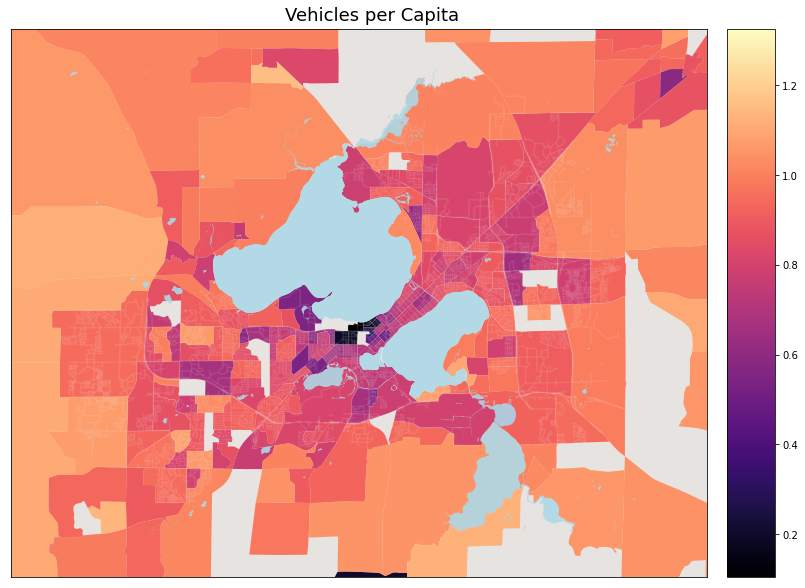

In [38]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, ax = plt.subplots(1, 1, figsize=(16, 16))

divider = make_axes_locatable(ax)

cax = divider.append_axes("right", size="5%", pad=-1.5)

df_dane.plot(column='VehiclesPerCapita', ax=ax, legend=True, cax=cax, cmap='magma')

lakeShapes_df.plot(color='lightblue', alpha=.9, ax=ax)
streetShapes_df.plot(color='#fbf7f4', alpha=.1, ax=ax)

ax.set_facecolor("#e7e3e0")

ax.set_xlim(-89.6, -89.2)
ax.set_ylim(42.97, 43.2)
ax.set_yticks([])
ax.set_xticks([])

#plt.legend()
fig.suptitle("Vehicles per Capita", fontsize=18, x=.55, y=.76)
plt.show()

In [40]:
route_freq_wkday = {2: {5: 1, 6: 2, 7: 2, 8: 2, 9: 2, 10: 2, 11: 2, 12: 2, 13: 2, 14: 2, 15: 2, 16: 2, 17: 2, 18: 2, 19: 2, 20: 2, 21: 2, 22: 2, 23: 1}, 
 4: {5: 1, 6: 2, 7: 2, 8: 2, 9: 2, 10: 2, 11: 2, 12: 2, 13: 2, 14: 2, 15: 2, 16: 2, 17: 2, 18: 1, 19: 1, 20: 1, 21: 1, 22: 1}, 
 5: {5: 1, 6: 2, 7: 2, 8: 2, 9: 2, 10: 2, 11: 2, 12: 2, 13: 2, 14: 2, 15: 2, 16: 2, 17: 2, 18: 2, 19: 1, 20: 1, 21: 1, 22: 1, 23: 1}, 
 6: {6: 2, 7: 2, 8: 2, 9: 2, 10: 2, 11: 2, 12: 2, 13: 2, 14: 2, 15: 2, 16: 2, 17: 2, 18: 2, 19: 2, 20: 2, 21: 2, 22: 3, 23: 1}, 
 7: {5: 1, 6: 2, 7: 2, 8: 2, 9: 2, 10: 2, 11: 2, 12: 2, 13: 2, 14: 2, 15: 2, 16: 2, 17: 2, 18: 2, 19: 2, 20: 2, 21: 2, 22: 2}, 
 8: {7: 2, 8: 2, 9: 2, 10: 2, 11: 2, 12: 2, 13: 2, 14: 2, 15: 2, 16: 2, 17: 2, 18: 1, 19: 1, 20: 1, 21: 1, 22: 1}, 
 10: {6: 1, 7: 4, 8: 4, 9: 4, 10: 4, 11: 4, 12: 4, 13: 4, 14: 4, 15: 4, 16: 4, 17: 4, 18: 2}, 11: {6: 1, 7: 1, 8: 1, 9: 1}, 
 12: {14: 1, 15: 1, 16: 1, 17: 1}, 
 13: {6: 1, 7: 1, 8: 1, 9: 1, 10: 1, 11: 1, 12: 1, 13: 1, 14: 1, 15: 1, 16: 1, 17: 1, 18: 1, 19: 1, 20: 1, 21: 1, 22: 1, 23: 1}, 
 15: {6: 1, 7: 2, 8: 2, 9: 2, 10: 1, 11: 1, 12: 1, 13: 1, 14: 1, 15: 2, 16: 2, 17: 2, 18: 1, 19: 1, 20: 1, 21: 1, 22: 1}, 
 16: {5: 1, 6: 3, 7: 2, 8: 2, 9: 2, 10: 2, 11: 2, 12: 2, 13: 2, 14: 2, 15: 2, 16: 2, 17: 2, 18: 1, 19: 1, 20: 1, 21: 1, 22: 2}, 
 17: {6: 1, 7: 2, 8: 2, 9: 2, 10: 2, 11: 2, 12: 2, 13: 2, 14: 2, 15: 2, 16: 2, 17: 2, 18: 2, 19: 2, 20: 2, 21: 2, 22: 2}, 
 18: {6: 2, 7: 2, 8: 2, 9: 2, 10: 2, 11: 2, 12: 2, 13: 2, 14: 2, 15: 2, 16: 2, 17: 2, 18: 2, 19: 2, 20: 2, 21: 2, 22: 2, 23: 1}, 
 20: {6: 2, 7: 2, 8: 2, 9: 2, 10: 2, 11: 2, 12: 2, 13: 2, 14: 2, 15: 2, 16: 2, 17: 2, 18: 2, 19: 2, 20: 2, 21: 2, 22: 1}, 
 21: {5: 1, 6: 2, 7: 2, 8: 2, 9: 2, 10: 2, 11: 2, 12: 2, 13: 2, 14: 2, 15: 2, 16: 2, 17: 2, 18: 1, 19: 1, 20: 1, 21: 1, 22: 2}, 
 22: {5: 2, 6: 2, 7: 2, 8: 2, 9: 2, 10: 2, 11: 2, 12: 2, 13: 2, 14: 2, 15: 2, 16: 2, 17: 2, 18: 2, 19: 1, 20: 1, 21: 1, 22: 1}, 
 23: {6: 1, 7: 2, 16: 2, 17: 2}, 
 26: {6: 1, 7: 2, 8: 2, 9: 2, 10: 2, 11: 2, 12: 2, 13: 2, 14: 2, 15: 2, 16: 2, 17: 2, 18: 2, 19: 2, 20: 2, 21: 2, 22: 2}, 
 27: {6: 1, 7: 2, 8: 1, 15: 1, 16: 2, 17: 2, 18: 1}, 
 30: {6: 2, 7: 2, 8: 2, 9: 2, 10: 2, 11: 2, 12: 2, 13: 2, 14: 2, 15: 2, 16: 2, 17: 2, 18: 2, 19: 2, 20: 2, 21: 2}, 
 31: {7: 1, 8: 1, 9: 1, 10: 1, 11: 1, 12: 1, 13: 1, 14: 1, 15: 1, 16: 1, 17: 1, 18: 1, 19: 1, 20: 1, 21: 1, 22: 1}, 
 32: {6: 1, 7: 1, 8: 1, 9: 1, 10: 1, 11: 1, 12: 1, 13: 1, 14: 1, 15: 1, 16: 1, 17: 1, 18: 1, 19: 1, 20: 1, 21: 1, 22: 1}, 
 33: {5: 1, 6: 2, 7: 2, 8: 1, 15: 1, 16: 2, 17: 2, 18: 1}, 
 36: {7: 1, 8: 1, 9: 1, 10: 1, 11: 1, 12: 1, 13: 1, 14: 1, 15: 1, 16: 1, 17: 1, 18: 1, 19: 1, 20: 1, 21: 1, 22: 1}, 
 39: {6: 1, 7: 1, 8: 1, 9: 1, 10: 1, 11: 1, 12: 1, 13: 1, 14: 1, 15: 1, 16: 1, 17: 1}, 
 40: {5: 1, 6: 1, 7: 1, 8: 1, 9: 1, 10: 1, 11: 1, 12: 1, 13: 1, 14: 1, 15: 1, 16: 1, 17: 1, 18: 1, 19: 1, 20: 1, 21: 1, 22: 1}, 
 44: {14: 1, 15: 1, 16: 2, 17: 2, 18: 1}, 
 48: {6: 1, 7: 2}, 
 49: {16: 2, 17: 2, 18: 1}, 
 50: {5: 1, 6: 2, 7: 2, 8: 2, 9: 2, 10: 2, 11: 2, 12: 2, 13: 2, 14: 2, 15: 2, 16: 2, 17: 2, 18: 2, 19: 2, 20: 2, 21: 2, 22: 2, 23: 1}, 
 51: {5: 1, 6: 1, 7: 1, 8: 1, 9: 1, 10: 1, 11: 1, 12: 1, 13: 1, 14: 1, 15: 1, 16: 1, 17: 1, 18: 1, 19: 1, 20: 1, 21: 1, 22: 1}, 
 52: {6: 1, 7: 1, 8: 1, 9: 1, 10: 1, 11: 1, 12: 1, 13: 1, 14: 1, 15: 1, 16: 1, 17: 1, 18: 1, 19: 1, 20: 1, 21: 1, 22: 1}, 
 55: {6: 1, 7: 1, 8: 1, 16: 1, 17: 2, 18: 1}, 
 67: {5: 1, 6: 2, 7: 2, 8: 2, 9: 2, 10: 2, 11: 2, 12: 2, 13: 2, 14: 2, 15: 2, 16: 2, 17: 2, 18: 2, 19: 2, 20: 2, 21: 2, 22: 2}, 
 70: {6: 1, 7: 1, 8: 1, 9: 1, 10: 1, 11: 1, 12: 1, 13: 1, 14: 1, 15: 1, 16: 1, 17: 1, 18: 1, 19: 1, 20: 1, 21: 1, 22: 1}, 
 72: {6: 1, 7: 2, 8: 1, 15: 2, 16: 2, 17: 2, 18: 1}, 
 73: {6: 1, 7: 1, 8: 1, 9: 1, 10: 1, 11: 1, 12: 1, 13: 1, 14: 1, 15: 1, 16: 1, 17: 1, 18: 1, 19: 1, 20: 1, 21: 1, 22: 1, 23: 1}, 
 75: {6: 2, 7: 1, 8: 2, 16: 2, 17: 1}, 
 81: {0: 2, 1: 2, 18: 1, 19: 2, 20: 2, 21: 2, 22: 2, 23: 2}, 
 82: {0: 2, 1: 2, 2: 1, 19: 2, 20: 2, 21: 2, 22: 2, 23: 2}, 
 84: {9: 4, 10: 4, 11: 4, 12: 4, 13: 4, 14: 4, 15: 4, 16: 5, 17: 4, 18: 4}}

In [48]:
route_freq_wkday[2][6]

2

In [42]:
RoutesShapeFile = "mmt_gtfs/Metro_Transit_Bus_Routes.shp"
routesShapes_df = geopandas.read_file(RoutesShapeFile)
routesShapes_df.info()
routesShapes_df.head(3)

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    47 non-null     int64   
 1   trips_rout  47 non-null     int64   
 2   route_shor  47 non-null     int64   
 3   route_url   47 non-null     object  
 4   ShapeSTLen  47 non-null     float64 
 5   geometry    47 non-null     geometry
dtypes: float64(1), geometry(1), int64(3), object(1)
memory usage: 2.3+ KB


,OBJECTID,trips_rout,route_shor,route_url,ShapeSTLen,geometry
0,422,9279,2,http://www.cityofmadison.com/metro/routes-sche...,96906.965571,"MULTILINESTRING ((-89.47360 43.05362, -89.4733..."
1,423,9281,4,http://www.cityofmadison.com/metro/routes-sche...,64774.133485,"MULTILINESTRING ((-89.40392 43.03862, -89.4039..."
2,424,9282,5,http://www.cityofmadison.com/metro/routes-sche...,61216.722662,"MULTILINESTRING ((-89.39414 43.03849, -89.3939..."


In [55]:
frequency_6am = []
for i in list(routesShapes_df['route_shor']):
    #print(i)
    if int(i) in route_freq_wkday:
        if 6 in route_freq_wkday[int(i)]:
            frequency_6am.append(route_freq_wkday[int(i)][6])
        else: 
            frequency_6am.append(0)
    else:
        frequency_6am.append(0)

len(frequency_6am)

47

In [57]:
routesShapes_df['frequency_6am'] = frequency_6am
routesShapes_df.head(3)

,OBJECTID,trips_rout,route_shor,route_url,ShapeSTLen,geometry,frequency_6am
0,422,9279,2,http://www.cityofmadison.com/metro/routes-sche...,96906.965571,"MULTILINESTRING ((-89.47360 43.05362, -89.4733...",2
1,423,9281,4,http://www.cityofmadison.com/metro/routes-sche...,64774.133485,"MULTILINESTRING ((-89.40392 43.03862, -89.4039...",2
2,424,9282,5,http://www.cityofmadison.com/metro/routes-sche...,61216.722662,"MULTILINESTRING ((-89.39414 43.03849, -89.3939...",2


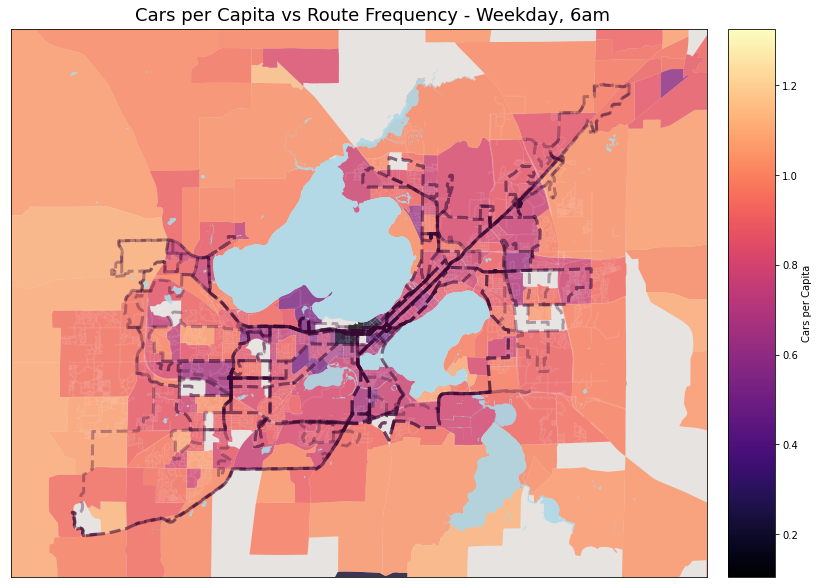

In [101]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, ax = plt.subplots(1, 1, figsize=(16, 16))

divider = make_axes_locatable(ax)

cax = divider.append_axes("right", size="5%", pad=-1.5)

df_dane.plot(column='VehiclesPerCapita', ax=ax, legend=True, legend_kwds={'label': "Cars per Capita"}, cax=cax, cmap='magma', alpha=.8)

lakeShapes_df.plot(color='lightblue', alpha=.9, ax=ax)
streetShapes_df.plot(color='#fbf7f4', alpha=.1, ax=ax)


for i in route_freq_wkday:
    for j in range(routesShapes_df.loc[routesShapes_df['route_shor']==i, 'frequency_6am'].item()):
        routesShapes_df[routesShapes_df['route_shor']==i].plot(ax=ax, linestyle="--", alpha=.35, linewidth=3, color='#380835')


ax.set_facecolor("#e7e3e0")

ax.set_xlim(-89.6, -89.2)
ax.set_ylim(42.97, 43.2)
ax.set_yticks([])
ax.set_xticks([])

#plt.legend()
fig.suptitle("Cars per Capita vs Route Frequency - Weekday, 6am", fontsize=18, x=.55, y=.76)
plt.savefig('PaperFigures/CarOwnershipVSfrequency6am', bbox_inches='tight')
plt.show()

In [102]:
frequency_12pm = []
for i in list(routesShapes_df['route_shor']):
    #print(i)
    if int(i) in route_freq_wkday:
        if 12 in route_freq_wkday[int(i)]:
            frequency_12pm.append(route_freq_wkday[int(i)][12])
        else: 
            frequency_12pm.append(0)
    else:
        frequency_12pm.append(0)

len(frequency_12pm)

47

In [103]:
routesShapes_df['frequency_12pm'] = frequency_12pm
routesShapes_df.head(3)

,OBJECTID,trips_rout,route_shor,route_url,ShapeSTLen,geometry,frequency_6am,frequency_12pm
0,422,9279,2,http://www.cityofmadison.com/metro/routes-sche...,96906.965571,"MULTILINESTRING ((-89.47360 43.05362, -89.4733...",2,2
1,423,9281,4,http://www.cityofmadison.com/metro/routes-sche...,64774.133485,"MULTILINESTRING ((-89.40392 43.03862, -89.4039...",2,2
2,424,9282,5,http://www.cityofmadison.com/metro/routes-sche...,61216.722662,"MULTILINESTRING ((-89.39414 43.03849, -89.3939...",2,2


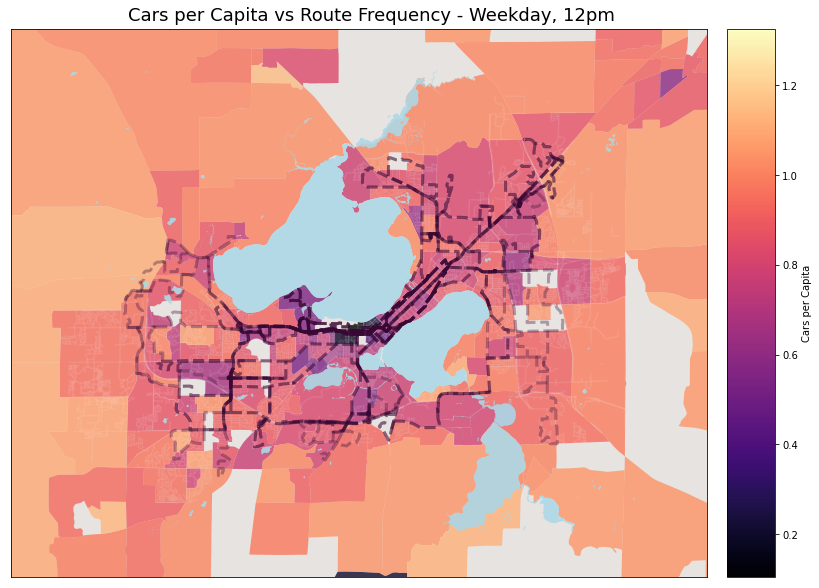

In [105]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, ax = plt.subplots(1, 1, figsize=(16, 16))

divider = make_axes_locatable(ax)

cax = divider.append_axes("right", size="5%", pad=-1.5)

df_dane.plot(column='VehiclesPerCapita', ax=ax, legend=True, legend_kwds={'label': "Cars per Capita"}, cax=cax, cmap='magma', alpha=.8)

lakeShapes_df.plot(color='lightblue', alpha=.9, ax=ax)
streetShapes_df.plot(color='#fbf7f4', alpha=.1, ax=ax)


for i in route_freq_wkday:
    for j in range(routesShapes_df.loc[routesShapes_df['route_shor']==i, 'frequency_12pm'].item()):
        routesShapes_df[routesShapes_df['route_shor']==i].plot(ax=ax, linestyle="--", alpha=.35, linewidth=3, color='#380835')


ax.set_facecolor("#e7e3e0")

ax.set_xlim(-89.6, -89.2)
ax.set_ylim(42.97, 43.2)
ax.set_yticks([])
ax.set_xticks([])

#plt.legend()
fig.suptitle("Cars per Capita vs Route Frequency - Weekday, 12pm", fontsize=18, x=.55, y=.76)
plt.savefig('PaperFigures/CarOwnershipVSfrequency12pm', bbox_inches='tight')
plt.show()